# 空间坐标变换

## 1. 以当前坐标为中心的变换矩阵

平移矩阵: 
$$
Mm=\left[\begin{array}{llll}
1 & 0 & 0 & d x \\
0 & 1 & 0 & d y \\
0 & 0 & 1 & d z \\
0 & 0 & 0 & 1
\end{array}\right]
$$

绕x轴旋转矩阵:
$$
Mx=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & \cos Rx & \sin Rx & 0 \\
0 & -\sin Rx & \cos Rx & 0 \\
0 & 0 & 0 & 1
\end{array}\right]
$$

绕y轴旋转矩阵:
$$
My=\left[\begin{array}{cccc}
\cos Ry & 0 & -\sin Ry & 0 \\
0 & 1 & 0 & 0 \\
\sin Ry & 0 & \cos Ry & 0 \\
0 & 0 & 0 & 1
\end{array}\right]
$$

绕z轴旋转矩阵:
$$
Mz=\left[\begin{array}{cccc}
\cos Rz & \sin Rz & 0 & 0 \\
-\sin Rz & \cos Rz & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right]
$$

变换结果:
$$
\left[\begin{array}{c}
X^{\prime} \\
Y^{\prime} \\
Z^{\prime} \\
1
\end{array}\right]=Mz \cdot My \cdot Mx \cdot Mm \cdot 
\left[\begin{array}{c}
X \\
Y \\
Z \\
1
\end{array}\right]
$$

>- 平移的单位是 单位距离. 平移矩阵在变换公式右边的位置是任意的. 变换矩阵是可逆矩阵.
- 旋转的单位是 角度°
- 每次的变换都围绕当前坐标系进行的, 而非世界坐标.

## 计算变换矩阵

In [227]:
# 变换矩阵
import numpy as np
from math import *

def creat_Mm(dx=0, dy=0, dz=0):
    '''
    创建平移矩阵, 单位 mm
    '''
    Mm = np.mat([ 
        [1, 0, 0, dx], 
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1] ]) 
    return Mm 

def creat_Mx(Rx = 0):
    '''
    创建绕x轴矩阵, 单位 角度°
    '''
    Rx = Rx * pi / 180
    Mx = np.mat([ 
        [1, 0, 0, 0], 
        [0, cos(Rx),    sin(Rx), 0],
        [0, -1*sin(Rx), cos(Rx), 0],
        [0, 0, 0, 1] ]) 
    return Mx

def creat_My(Ry = 0):
    '''
    创建绕y轴矩阵, 单位 角度°
    '''
    Ry = Ry * pi / 180
    My = np.mat([ 
        [cos(Ry), 0, -1*sin(Ry), 0], 
        [0, 1, 0, 0],
        [sin(Ry), 0, cos(Ry),   0],
        [0, 0, 0, 1] ]) 
    return My

def creat_Mz(Rz = 0):
    '''
    创建绕z轴矩阵, 单位 角度°
    '''
    Rz = Rz * pi / 180
    Mz = np.mat([ 
        [cos(Rz), sin(Rz), 0, 0], 
        [-1*sin(Rz), cos(Rz), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1] ]) 
    return Mz

def creat_I0():
    # 原始坐标轴变换矩阵
    I0 = np.mat([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1] ])
    return I0

def creat_M(dx=0, dy=0, dz=0, Rx=0, Ry=0, Rz=0, reverse=False):
    '''
    变换矩阵
    dx, dy, dz 向原始坐标 x, y, z轴方向平移距离
    Rx, Ry, Rz 以各坐标轴为中心的旋转角度
    reverse 是否是逆变换, 不处理参数, 但是改变运算顺序
    '''
    if reverse:
        M = creat_Mm(dx, dy, dz) * creat_Mx(Rx) * creat_My(Ry) * creat_Mz(Rz) 
        return M        
    M = creat_Mz(Rz) * creat_My(Ry) * creat_Mx(Rx) * creat_Mm(dx, dy, dz)
    return M

In [228]:
#　依次绕x, y, z轴 旋转
M = creat_M(dx=100, Rx=45)
print('变换矩阵示例:\n',M)

变换矩阵示例:
 [[  1.           0.           0.         100.        ]
 [  0.           0.70710678   0.70710678   0.        ]
 [  0.          -0.70710678   0.70710678   0.        ]
 [  0.           0.           0.           1.        ]]


### 验证
尝试验证该变换的正确性, 结合之前创建的模拟点云程序.        

1. 创建点云点, 画图      
2. 创建变换矩阵, 应用变换矩阵, 画图   

In [229]:
# 椭圆柱侧面点云  (封装成函数)
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def cylinderPC(stepz=0.2, stepA=0.1, zlim=[0, 1], a=1, b=1, noise=0):
    """
    椭圆柱侧面点云生成, z轴为轴心, 向正负方向延长
    返回值: Xn, Yn, Z
    参数:
    stepz   z轴方向步距  
    stepA   xoy平面弧度步距
    zlim    z坐标范围[z1, z2]
    a, b    长轴短轴
    noise   噪声系数
    """
    X = a * np.cos(np.arange(0,2*np.pi,stepA))          # 生成坐标
    Y = b * np.sin(np.arange(0,2*np.pi,stepA))
    Z = np.arange(zlim[0], zlim[1], stepz)
    X, _ = np.meshgrid(X, Z)  
    Y, Z = np.meshgrid(Y, Z)  


    noiseX = (np.random.rand(*X.shape)-0.5) * 2 * noise   # 加噪 [-0.25, 0.25) 噪声
    noiseY = (np.random.rand(*Y.shape)-0.5) * 2 * noise   # X Y 均加噪
    Xn = X + noiseX
    Yn = Y + noiseY
    return Xn, Yn, Z

def plot_3D(X, Y, Z):
    # 画图
    fig = plt.figure()                          
    ax = Axes3D(fig)
    # 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
    ax.set_zlabel('Z')           # 坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.show()

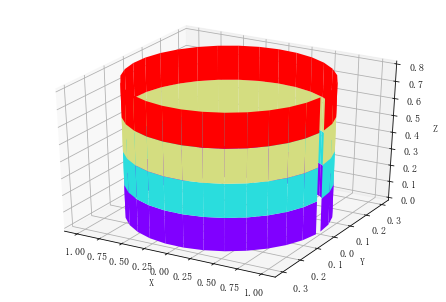

In [230]:
# 1. 创建点云点, 画图
Xn, Yn, Z = cylinderPC(stepz=0.2, stepA=0.2, zlim=[0, 1], a=1, b=0.3, noise=0)
plot_3D(Xn, Yn, Z)

In [231]:
# 坐标系变换函数
def convert(M, X, Y, Z):
    '''
    变换函数
    M 变换矩阵
    X 所有点x坐标
    Y 所有点y坐标
    Z 所有点z坐标
    返回 变换后的 X Y Z 坐标
    '''
    E = np.ones(Z.shape)
    A0 = np.array([X, Y, Z, E])   # 原始矩阵
    a0 = np.stack(A0, axis=2)       # 转换为3维
    a0t = a0.reshape((-1,4))        # reshape

    b0t = np.dot(M, a0t.T)          # 矩阵点乘, np.mat只能是二维, 所以A0需要reshape
    b0t = np.array(b0t).T
    b0 =b0t.reshape(a0.shape)       # 变回原始矩阵形状
    Bx = b0[:, :, 0]
    By = b0[:, :, 1]
    Bz = b0[:, :, 2]
    return Bx, By, Bz

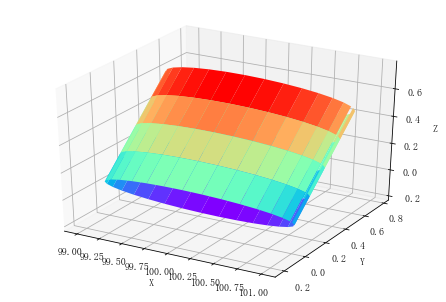

In [232]:
# 2. 创建变换矩阵, 应用变换矩阵, 画图
Bx, By, Bz = convert(M, Xn, Yn, Z)

plot_3D(Bx, By, Bz)             # 画图

### 逆变换
很明显, 变换矩阵 `M` 是可逆矩阵, 根据变换公式, 容易得到:
$$
M^{-1} \cdot B = A
$$
即
$$
{(Mz \cdot My \cdot Mx \cdot Mm)}^{-1} \cdot 
\left[\begin{array}{c}
X^{\prime} \\
Y^{\prime} \\
Z^{\prime} \\
1
\end{array}\right]=
\left[\begin{array}{c}
X \\
Y \\
Z \\
1
\end{array}\right]
$$

通过对变换后的图形逆变换, 实现对变换可靠性的印证.

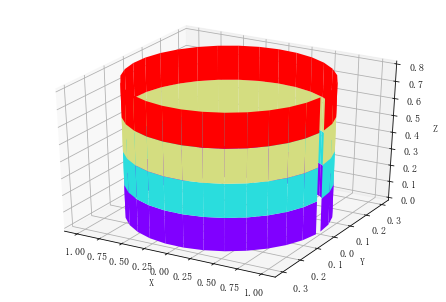

In [233]:
# 对变换后的图形进行逆变换
Minv = np.linalg.inv(M)         # 变换矩阵的逆
iAx, iAy, iAz = convert(Minv, Bx, By, Bz)

plot_3D(iAx, iAy, iAz)              # 画图

## 2. 任意两个坐标系之间的变换
**问题: 已知两组变换相对世界坐标的参数, 如何之间进行两组变换之间的转换, 求取变换矩阵?**    

分析:     

1. 平移矩阵 $Mm$ 相互构成可交换矩阵, 所以在只有平移的情况下, 直接拿两组变换的平移值相减即可.      
变换的坐标差值为: $ (Px1, Py1, Pz1) - (Px0, Py0, Pz0) = (dx, dy, dz) $      
则有: $ P1 = M\Delta m \cdot P0 $    
    

In [222]:
param0 = np.array([1, 2, 0, 0, 0, 0])       # (Px0, Py0, Pz0)
paramDelta = np.array([1, 3, 0, 0, 0, 0])   # (dx,dy,dz)
param1 = param0 + paramDelta                # (Px1, Py1, Pz1)

M0 = creat_M(*param0)
M1 = creat_M(*param1)
Md = creat_M(*paramDelta)

print('只有平移变换')
print("O->P1 变换矩阵:\n", M1)
print("O->P0 变换矩阵:\n", M0)
print("O->P0->P1 变换矩阵:\n", np.dot(Md, M0))

只有平移变换
O->P1 变换矩阵:
 [[1. 0. 0. 2.]
 [0. 1. 0. 5.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
O->P0 变换矩阵:
 [[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
O->P0->P1 变换矩阵:
 [[1. 0. 0. 2.]
 [0. 1. 0. 5.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


2. 当包含绕坐标轴旋转的变换时, 不满足平移变换的规律. 但是根据 `坐标变换的公式` 可以得到:       
$$
P_0 = M_0 \cdot O \Leftrightarrow {M_0}^{-1} \cdot P_0 = O  
$$ 
$$
P_1 = M_1 \cdot O = M_1 \cdot {M_0}^{-1} \cdot P_0
$$
令
$$
M^{'} = M_1 \cdot {M_0}^{-1} = Mz1 \cdot My1 \cdot Mx1 \cdot Mm1 \cdot M(-m0) \cdot M(-x0) \cdot M(-y0) \cdot M(-z0)   
$$
则有
$$
P_1 = M^{'} \cdot P_0
$$

此时, $ M^{'} $ 为任意两个坐标系之间的变换矩阵

In [237]:
param0 = np.array([0, 15, 50, 40, 10, 45])           # (Px0, Py0, Pz0)
paramDelta = np.array([1000, 0, 30, 55, -244, 60])     # (dx,dy,dz)
param1 = param0 + paramDelta                        # (Px1, Py1, Pz1)

M0 = creat_M(*param0)                   
M1 = creat_M(*param1)
M_ = np.dot(M1, np.linalg.inv(M0))      # M'
# 用 后一个公式求 M', 更精确
M_byM = np.dot( creat_M(*param1, reverse=False), creat_M(*(-1*param0), reverse=True)) 

print('平移和角度旋转共同作用')
print("O->P1 M1\n", M1)
print("O->P0 M0\n", M0)
print("P0->O->P1 M'\n", M_, '\n\n', M_byM)

平移和角度旋转共同作用
O->P1 M1
 [[ 1.52130018e-01 -2.92778200e-01  9.44000733e-01  2.23258403e+02]
 [ 5.67756956e-01 -7.55919188e-01 -3.25942051e-01  5.30342804e+02]
 [ 8.09016994e-01  5.85548552e-01  5.12288602e-02  8.21898531e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
O->P0 M0
 [[ 0.69636424  0.6206017   0.36045856 27.33195363]
 [-0.69636424  0.46274874  0.54858039 34.37025075]
 [ 0.17364818 -0.63302222  0.75440651 28.22499201]
 [ 0.          0.          0.          1.        ]]
P0->O->P1 M'
 [[ 2.64512403e-01  2.76439645e-01  9.23912502e-01  1.80450040e+02]
 [-1.91247695e-01 -9.23971712e-01  3.31210800e-01  5.57978694e+02]
 [ 9.45228812e-01 -2.64305501e-01 -1.91533533e-01  8.10553860e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

 [[ 2.64512403e-01  2.76439645e-01  9.23912502e-01  1.80450040e+02]
 [-1.91247695e-01 -9.23971712e-01  3.31210800e-01  5.57978694e+02]
 [ 9.45228812e-01 -2.64305501e-01 -1.91533533e-01  8.10553860e+02]
 [ 0.00

画图直观展示

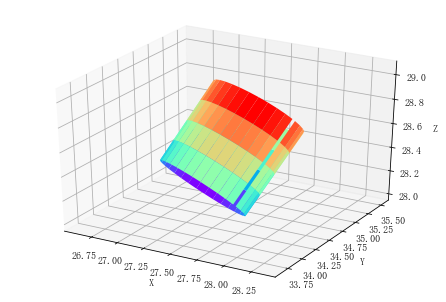

In [238]:
# P0 
Xp0, Yp0, Zp0= convert(M0, Xn, Yn, Z)
plot_3D(Xp0, Yp0, Zp0)

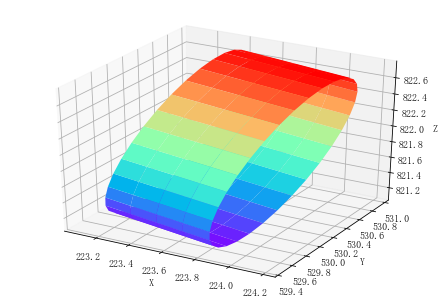

In [239]:
# P1
Xp1, Yp1, Zp1= convert(M1, Xn, Yn, Z)
plot_3D(Xp1, Yp1, Zp1)

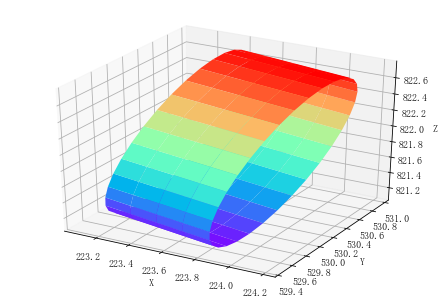

In [240]:
# P0->P1 
Xp01, Yp01, Zp01= convert(M_byM, Xp0, Yp0, Zp0)
plot_3D(Xp01, Yp01, Zp01)